###TALLER 1
Crear un modelo Naive Bayes para la preaprobación de créditos para la totalidad de los solicitantes del crédito de la base de datos de referencia.

Variables: Edad, Hijos, Personas a Cargo, Estrato, Ingresos, Egresos, Monto, Plazo y Cuota.

Recalcula las métricas de evaluación bajo este nuevo escenario y para cada métrica explica si mejoraron o desmejoraron y las razones identificadas.

1- IMPORTAMOS LOS DATOS Y LIBRERIAS

In [5]:
import pandas as pd
import numpy as np
solicitantes = pd.read_excel("/content/drive/MyDrive/EAFIT/Analitica de negocio/0. SolicitantesCrédito.xlsx")
solicitantes

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,3,Bachiller,Ninguno,5424576,...,48,82691.506204,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,4,Técnico,Ninguno,1144064,...,36,22781.212598,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,3,Tecnólogo,Indefinido,2069853,...,36,46294.596244,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0.0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,2,Tecnólogo,Ninguno,1893080,...,24,69564.950015,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,2,Especializacion,Ninguno,3000367,...,24,112478.307883,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,31,Hombre,Soltero,2,0,5,Bachiller,Indefinido,5891088,...,48,115108.056436,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.035120,659.471375,0.066962
8374,8375,38,Hombre,Separado,0,0,3,Bachiller,Labor Contratada,3092079,...,36,96789.562091,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.101976,465.011536,0.165936
8375,8376,43,Mujer,Casado,1,2,2,Tecnólogo,Ninguno,2542007,...,36,49713.608249,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.156707,423.237305,0.247763
8376,8377,37,Mujer,Casado,1,2,3,Tecnólogo,Indefinido,5677067,...,36,163602.818587,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.037719,592.670837,0.051356


In [7]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [8]:
# Elimino las filas donde la columna de "PreApr" está vacía.
XD = solicitantes.dropna(subset="PreApr")

In [11]:
# Nos aseguramos que quedó bien
XD.shape

(5842, 35)

In [12]:
##Escogemos las variable independientes con las que vamos a entrenar el modelo
##Edad, Hijos, Personas a Cargo, Estrato, Ingresos, Egresos, Monto, Plazo y Cuota.
XD = XD [["Edad", "Hijos", "Perscargo", "Estrato", "Ingresos", "Egresos", "Monto (EAD)", "Plazo", "Cuota (COP)"]]
XD

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,38,1,0,3,5424576,7585302,2.815030e+06,48,82691.506204
1,51,6,1,4,1144064,1640079,6.301439e+05,36,22781.212598
2,37,2,0,3,2069853,2831440,1.280540e+06,36,46294.596244
3,29,1,0,2,1893080,2482276,1.393414e+06,24,69564.950015
4,42,3,4,2,3000367,3630221,2.252986e+06,24,112478.307883
...,...,...,...,...,...,...,...,...,...
8371,48,0,0,3,4831392,3392105,3.366188e+06,36,121695.762156
8373,31,2,0,5,5891088,4292158,3.918572e+06,48,115108.056436
8374,38,0,0,3,3092079,3028098,2.677266e+06,36,96789.562091
8375,43,1,2,2,2542007,3513112,1.375112e+06,36,49713.608249


In [13]:
#Escojo a variable dependiente
yd = solicitantes['PreApr'].dropna()
yd

,PreApr
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
8371,1.0
8373,1.0
8374,1.0
8375,1.0


In [17]:
##Convierto los datos a Arrays para que el modelo me los endienda

import numpy as np
XDArray = np.array(XD, dtype=float)
ydArray = np.array(yd, dtype=float)
print(XDArray)
print(ydArray)

[[3.80000000e+01 1.00000000e+00 0.00000000e+00 ... 2.81503004e+06
  4.80000000e+01 8.26915062e+04]
 [5.10000000e+01 6.00000000e+00 1.00000000e+00 ... 6.30143930e+05
  3.60000000e+01 2.27812126e+04]
 [3.70000000e+01 2.00000000e+00 0.00000000e+00 ... 1.28054021e+06
  3.60000000e+01 4.62945962e+04]
 ...
 [3.80000000e+01 0.00000000e+00 0.00000000e+00 ... 2.67726552e+06
  3.60000000e+01 9.67895621e+04]
 [4.30000000e+01 1.00000000e+00 2.00000000e+00 ... 1.37511242e+06
  3.60000000e+01 4.97136082e+04]
 [3.70000000e+01 1.00000000e+00 2.00000000e+00 ... 4.52536592e+06
  3.60000000e+01 1.63602819e+05]]
[1. 1. 0. ... 1. 1. 1.]


3- Implementamos el modelo Naive Bayes

In [18]:
# Importo la libreria que contiene el modelo
from sklearn.naive_bayes import GaussianNB

In [20]:
# Creo la variable que aloja el modelo
modelNB = GaussianNB()

In [21]:
# Entreno el modelo
modelNB.fit(XDArray, ydArray)

GaussianNB()

In [26]:
ydPred = modelNB.predict(XDArray)
ydPred

array([1., 0., 0., ..., 0., 0., 1.])

4- Creamos la matriz de confusión

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
cm = confusion_matrix(ydArray, ydPred)
cm

array([[2539,  420],
       [1041, 1842]])

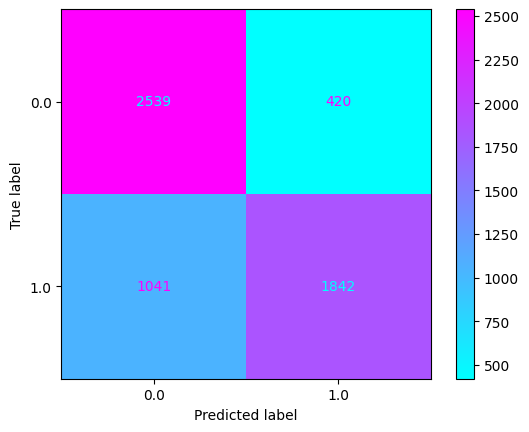

In [29]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelNB.classes_)
disp.plot(cmap="cool")
plt.show()

In [30]:
#Métricas de evaluación

#Extraigo los valores de la matriz de confusión

VN= cm[0,0] ; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

#Metricas

#Exactitud
exactitud = (VN+VP)/cm.sum()
print(f"La exactitud (accuracy) del modelo es de {exactitud: .2%}")

#Tasa de error
error = 1 - exactitud
print(f"el error del modelo es de {error: .2%}")

# Precisión
precision = VP/(FP+VP)
print(f"La precisión del modelo es de {precision: .2%}")

# Sensibilidad

sensibilidad = VP/(VP+FN)
print(f"La sensibilidad es de{sensibilidad: .2%}")

# Especificidad

especificidad = VN/(VN+FP)
print(f"La espeficidad del modelo es de {especificidad: .2%}")

La exactitud (accuracy) del modelo es de  74.99%
el error del modelo es de  25.01%
La precisión del modelo es de  81.43%
La sensibilidad es de 63.89%
La espeficidad del modelo es de  85.81%


En la **exactitud** el modelo tiene ligeramente un peor desempeño con 74,99% (-1.15%). Esto quiere decir que las nuevas variable probablemente no ayudaron a entrenar mejor el modelo para predecir mejor los resulpados.


El **Error** del modelo nuevo subió igual +1.15% hasta lelgar a 25.01. Por ende el modelo comete un poco mas errores que el pasado, no mucho pero si, un 1% extra de errores.

En cuanto a la **precisión** el modelo mejoró un poquito, llegó a 81.43%. Esto indica una mejora en la aprobación de personas que en realidad si tendrían que ser aprobadas y evitar un poco los falsos positivos. Los falsos positivos totales pasaron de 456 a 420, una mejora para este nuevo modelo.

La **sensibilidad** bajó "bastante" llegando a 63.89% (-3.57), esto indica probablemente que el modelo no es tan bueno aprobando personas que si deberian ser aprobadas, es decir puede que hayan más falsos negativos. Y lo confirmamos porque estos pasan de 938 a 1041.

Finamente la **especificidad** aumentó a 85.81%, lo que nos dice que el modelo mejoró encuanto a la precisión al rechazar personas que en realidad tendrán que ser rechazadas. Los negativos negativos aumentaron.
